# Import Libraries



In [1]:
import pyforest

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,LabelEncoder

from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate

from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
df=pd.read_csv('heart.csv')

<IPython.core.display.Javascript object>

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
209,54,M,ASY,125,216,0,Normal,140,N,0.0,Flat,1
410,62,M,ASY,150,0,1,ST,78,N,2.0,Flat,1
811,58,F,ASY,100,248,0,LVH,122,N,1.0,Flat,0
513,62,M,TA,112,258,0,ST,150,Y,1.3,Flat,1
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
234,54,F,ATA,140,309,0,ST,140,N,0.0,Up,0
251,48,M,ASY,120,260,0,Normal,115,N,2.0,Flat,1
575,56,M,ASY,137,282,1,Normal,126,Y,1.2,Flat,1
249,49,M,ASY,130,341,0,Normal,120,Y,1.0,Flat,1
787,67,M,ASY,100,299,0,LVH,125,Y,0.9,Flat,1


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [10]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [11]:
df.duplicated().value_counts()

False    918
dtype: int64

In [12]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Examining the Target Variable

In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

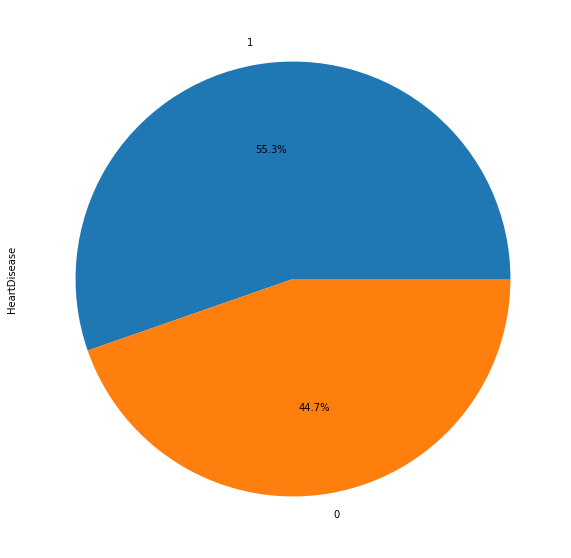

In [15]:
df["HeartDisease"].value_counts().plot(kind="pie",autopct='%1.1f%%', figsize=(10,10));

In [16]:
df["HeartDisease"].skew()

-0.21508633825088655

In [17]:
df["HeartDisease"].kurtosis()

-1.9580084425329685

In [18]:
df['HeartDisease'].iplot(kind='histogram' )

In [19]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns
ndf=df[numerical]

cdf=df[categorical]

In [20]:
ndf.columns


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [21]:
cdf.columns


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [22]:
ndf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [23]:
ndf.iplot(kind='hist');

In [24]:
df[numerical].iplot(kind='histogram', subplots=True,bins=50)

In [25]:
for i in numerical:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

<IPython.core.display.Javascript object>

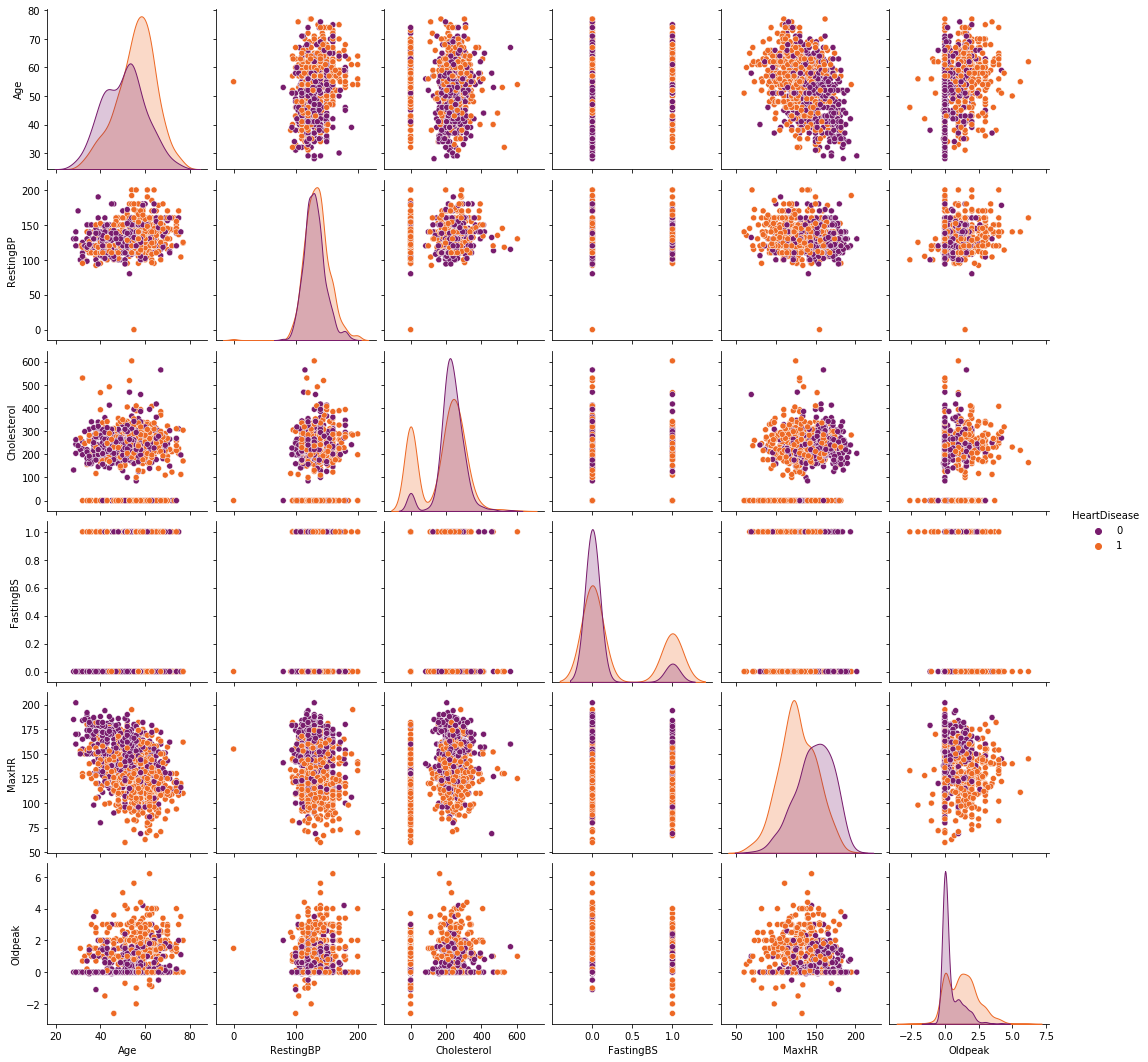

In [26]:
sns.pairplot(df, hue="HeartDisease", palette="inferno");

In [27]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

In [28]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

RestingBP       3.271251
Oldpeak         1.203064
Cholesterol     0.118208
Age            -0.386140
FastingBS      -0.401960
MaxHR          -0.448248
HeartDisease   -1.958008
dtype: float64

In [29]:
df[numerical].iplot(kind='histogram' ,subplots=True,bins=50)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

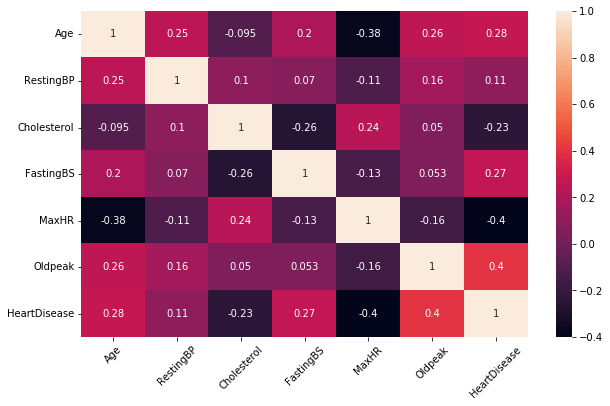

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

In [31]:
df[categorical].head().T

,0,1,2,3,4
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingECG,Normal,Normal,ST,Normal,Normal
ExerciseAngina,N,N,N,Y,N
ST_Slope,Up,Flat,Up,Flat,Up


In [32]:
cdf.describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [33]:
for i in categorical:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

In [34]:
for i in cdf.columns:
    print(cdf[i].value_counts())
    print('\n')

M    725
F    193
Name: Sex, dtype: int64


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


N    547
Y    371
Name: ExerciseAngina, dtype: int64


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64




In [35]:
df[categorical].iplot(kind='hist');

In [36]:
df[categorical].iplot(kind='histogram',subplots=True,bins=50)

In [37]:
df.head(50)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Creating Dummies and Data Splitting

In [38]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

<IPython.core.display.Javascript object>

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [39]:
x = df1.drop(["HeartDisease"], axis=1)
y = df1["HeartDisease"]

In [40]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [41]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify = y, random_state = 101)

In [43]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
6,45,130,237,0,170,0.0,0,1,0,0,1,0,0,0,1
342,61,110,0,1,113,1.4,1,0,0,0,1,0,0,1,0
413,56,125,0,1,98,-2.0,1,0,1,0,1,0,0,1,0
16,38,110,196,0,166,0.0,1,0,0,0,1,0,0,1,0
138,54,140,166,0,118,0.0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0.2,0,0,0,0,1,0,1,1,0
820,52,152,298,1,178,1.2,1,0,0,1,1,0,0,1,0
433,46,110,236,0,125,2.0,1,0,0,0,1,0,1,1,0
598,55,120,226,0,127,1.7,1,0,0,0,0,0,1,0,0


In [44]:
y_train

6      0
342    1
413    1
16     1
138    1
      ..
912    1
820    0
433    1
598    1
770    0
Name: HeartDisease, Length: 780, dtype: int64

In [45]:
y_test

526    1
523    1
376    1
177    0
199    0
      ..
869    0
17     0
903    0
793    1
841    1
Name: HeartDisease, Length: 138, dtype: int64

In [46]:
x_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
526,65,144,312,0,113,1.7,1,0,0,0,0,0,1,1,0
523,59,124,160,0,117,1.0,1,0,0,0,1,0,1,1,0
376,47,155,0,0,118,1.0,1,0,1,0,1,0,1,1,0
177,59,140,287,0,150,0.0,1,1,0,0,1,0,0,0,1
199,57,130,308,0,98,1.0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,59,150,212,1,157,1.6,1,0,1,0,1,0,0,0,1
17,43,120,201,0,165,0.0,0,1,0,0,1,0,0,0,1
903,56,130,221,0,163,0.0,1,1,0,0,0,0,0,0,1
793,67,125,254,1,163,0.2,1,0,0,0,1,0,0,1,0


In [47]:
y_test

526    1
523    1
376    1
177    0
199    0
      ..
869    0
17     0
903    0
793    1
841    1
Name: HeartDisease, Length: 138, dtype: int64

In [48]:
scaler = MinMaxScaler()

In [49]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled= pd.DataFrame(data=x_train_scaled,columns=x_train.columns)
x_train_scaled

<IPython.core.display.Javascript object>

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.346939,0.650,0.393035,0.0,0.774648,0.243902,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.673469,0.550,0.000000,1.0,0.373239,0.414634,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.571429,0.625,0.000000,1.0,0.267606,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.204082,0.550,0.325041,0.0,0.746479,0.243902,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.530612,0.700,0.275290,0.0,0.408451,0.243902,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.591837,0.700,0.399668,0.0,0.443662,0.268293,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
776,0.489796,0.760,0.494196,1.0,0.830986,0.390244,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
777,0.367347,0.550,0.391376,0.0,0.457746,0.487805,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
778,0.551020,0.600,0.374793,0.0,0.471831,0.451220,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
x_train_scaled.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.517059,0.662494,0.329268,0.230769,0.538868,0.352376,0.796154,0.192308,0.211538,0.050000,0.606410,0.194872,0.419231,0.496154,0.437179
std,0.190412,0.094106,0.182213,0.421595,0.180509,0.128344,0.403114,0.394366,0.408661,0.218085,0.488859,0.396356,0.493750,0.500306,0.496356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.600000,0.286484,0.000000,0.422535,0.243902,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.650000,0.369818,0.000000,0.542254,0.317073,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653061,0.700000,0.444444,0.000000,0.670775,0.426829,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled= pd.DataFrame(data=x_test_scaled,columns=x_test.columns)
x_test_scaled

<IPython.core.display.Javascript object>

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.765957,0.44,0.589792,0.0,0.380165,0.651515,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.638298,0.24,0.302457,0.0,0.413223,0.545455,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.382979,0.55,0.000000,0.0,0.421488,0.545455,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.638298,0.40,0.542533,0.0,0.685950,0.393939,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.595745,0.30,0.582231,0.0,0.256198,0.545455,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.638298,0.50,0.400756,1.0,0.743802,0.636364,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
134,0.297872,0.20,0.379962,0.0,0.809917,0.393939,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
135,0.574468,0.30,0.417769,0.0,0.793388,0.393939,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
136,0.808511,0.25,0.480151,1.0,0.793388,0.424242,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
x_test_scaled.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.542553,0.318188,0.378483,0.246377,0.590490,0.526570,0.753623,0.166667,0.275362,0.050725,0.572464,0.188406,0.318841,0.528986,0.391304
std,0.212117,0.167237,0.202176,0.432470,0.202408,0.173825,0.432470,0.374036,0.448324,0.220234,0.496523,0.392460,0.467725,0.500978,0.489820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404255,0.200000,0.331758,0.000000,0.440083,0.393939,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.553191,0.300000,0.417769,0.000000,0.603306,0.454545,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.702128,0.400000,0.498582,0.000000,0.741736,0.636364,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:

x_train_scaled.iplot(kind='histogram',subplots=True,bins=50)

In [54]:
x_test_scaled.iplot(kind='histogram',subplots=True,bins=50)

In [55]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

# Model Training

In [71]:
#WITH K=5

KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(x_train_scaled, y_train)
y_pred = KNN_model.predict(x_test_scaled)
y_train_pred = KNN_model.predict(x_train_scaled)


In [72]:
KNN_model

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

[[50 12]
 [ 9 67]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        62
           1       0.85      0.88      0.86        76

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.85       138
weighted avg       0.85      0.85      0.85       138

--------------------------------------------------------


<IPython.core.display.Javascript object>

,train_set,test_set
Accuracy,0.883333,0.847826
Precision,0.881432,0.848101
Recall,0.912037,0.881579
f1,0.896473,0.864516


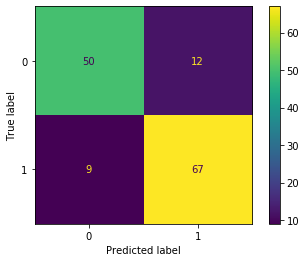

In [58]:
knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)



print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------------")

plot_confusion_matrix(KNN_model, x_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)


In [59]:
y_pred_proba = KNN_model.predict_proba(x_test_scaled)

In [60]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Proba_1": y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)


<IPython.core.display.Javascript object>

,Actual,Pred,Proba_1,Proba_0
845,1,1,0.6,0.4
376,1,1,0.6,0.4
610,1,1,1.0,0.0
743,0,0,0.0,1.0
159,0,0,0.0,1.0
765,0,0,0.2,0.8
360,1,1,1.0,0.0
515,0,1,1.0,0.0
589,1,1,1.0,0.0
879,1,0,0.2,0.8


In [73]:
test_error_rates = []


for k in range(1, 30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(x_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(x_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

In [74]:
test_error_rates

[0.18840579710144922,
 0.23913043478260865,
 0.1594202898550725,
 0.17391304347826086,
 0.15217391304347827,
 0.16666666666666663,
 0.14492753623188404,
 0.1594202898550725,
 0.16666666666666663,
 0.14492753623188404,
 0.15217391304347827,
 0.1376811594202898,
 0.1376811594202898,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898,
 0.1159420289855072,
 0.1376811594202898,
 0.1376811594202898,
 0.1376811594202898,
 0.12318840579710144,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.1376811594202898,
 0.1376811594202898,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898]

In [75]:
max(test_error_rates),min(test_error_rates)

(0.23913043478260865, 0.1159420289855072)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

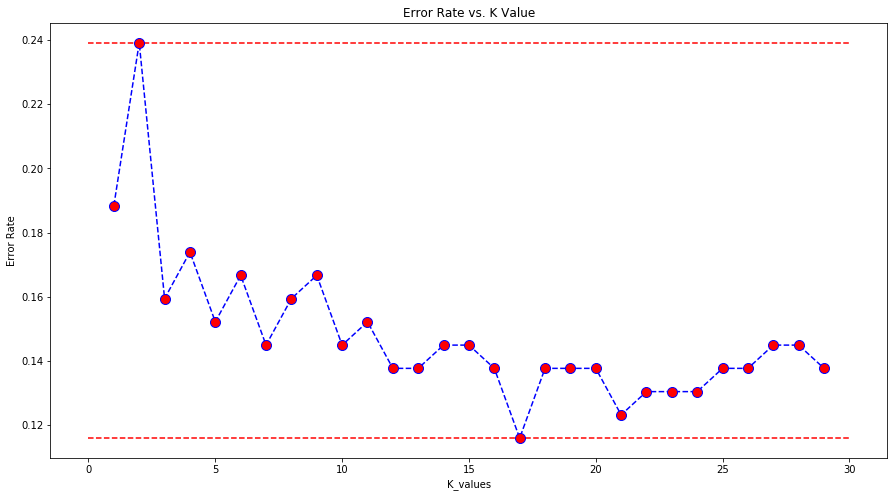

In [76]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.1159420289855072, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.23913043478260865, xmin=0, xmax=30, colors='r', linestyles="--");


In [77]:
k_values= range(1, 30)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}
KNN_grid = KNeighborsClassifier()
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')
KNN_grid_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [78]:
print(KNN_grid_model.best_params_)
print("\n")
print(KNN_grid_model.best_estimator_)

{'n_neighbors': 26, 'p': 2, 'weights': 'distance'}


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='distance')


WITH K=26
-------------------
[[50 12]
 [ 9 67]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        62
           1       0.85      0.88      0.86        76

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.85       138
weighted avg       0.85      0.85      0.85       138

--------------------------------------------------------


<IPython.core.display.Javascript object>

,train_set,test_set
Accuracy,0.860256,0.847826
Precision,0.854945,0.848101
Recall,0.900463,0.881579
f1,0.877114,0.864516


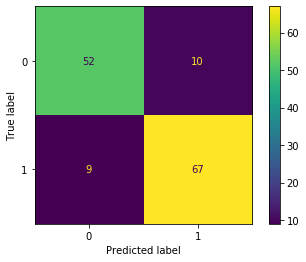

In [79]:
# NOW WITH K=26

KNN_model = KNeighborsClassifier(n_neighbors=26, p=2)
KNN_model.fit(x_train_scaled, y_train)
pred = KNN_model.predict(x_test_scaled)
y_train_pred = KNN_model.predict(x_train_scaled)


knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)




print('WITH K=26')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, x_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

WITH K=13
-------------------
[[50 12]
 [ 9 67]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        62
           1       0.85      0.88      0.86        76

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.85       138
weighted avg       0.85      0.85      0.85       138

--------------------------------------------------------


<IPython.core.display.Javascript object>

,train_set,test_set
Accuracy,0.869231,0.847826
Precision,0.863436,0.848101
Recall,0.907407,0.881579
f1,0.884876,0.864516


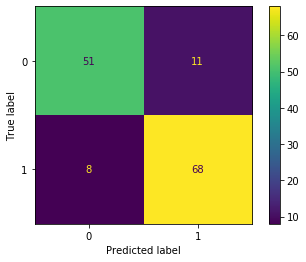

In [80]:
# NOW WITH K=13

KNN_model = KNeighborsClassifier(n_neighbors=13, p=2)
KNN_model.fit(x_train_scaled, y_train)
pred = KNN_model.predict(x_test_scaled)
y_train_pred = KNN_model.predict(x_train_scaled)


knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)




print('WITH K=13')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, x_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

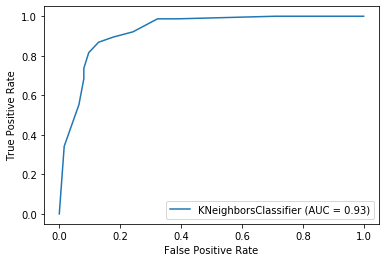

In [81]:
plot_roc_curve(KNN_model, x_test_scaled, y_test);



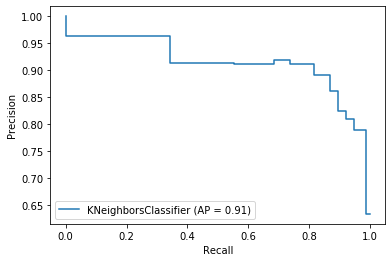

In [82]:
plot_precision_recall_curve(KNN_model, x_test_scaled, y_test);

#  CONCLUSION

In this study respectively,

We have tried to a predict classification problem in Heart Disease Dataset by a variety of models to classifiy Heart Disease predictions in the context of determining whether anybody is likely to get hearth disease based on the input parameters like gender, age and various test results or not.

We have made the detailed exploratory analysis (EDA).

There have been NO missing values in the Dataset.

We have decided which metrics will be used.

We have analyzed both target and features in detail.

We have transformed categorical variables into dummies so we can use them in the models.


We have cross-checked the model obtained from train sets by applying cross validation for each model performance.



Lastly we have examined the results visually .

